# 📌 Support Vector Machines (SVM) - A Complete Guide

This notebook will walk through the **theory, mathematics, and practical implementation** of **Support Vector Machines (SVMs)**.  

---

## 📖 1. Introduction to Support Vector Machines (SVM)
**Support Vector Machines (SVM)** is a powerful supervised learning algorithm used for **classification** and **regression**.  
It aims to **find the best hyperplane** that separates classes with the **largest margin**.

### 🔹 Why Use SVM?
✔ Works well on **small to medium-sized datasets**  
✔ **Effective in high-dimensional spaces**  
✔ **Can handle non-linearly separable data** with **kernel trick**  

### 🔹 How SVM Works?
SVM finds a **decision boundary** (hyperplane) that **maximizes the margin** between classes.

- **Linear SVM** → Used when data is linearly separable.  
- **Non-Linear SVM** → Uses **kernel functions** to transform data into higher dimensions.

---

# 📖 9. Support Vector Machines (SVM) - Margin & Delta Gap

In this section, we will dive deeper into the **mathematics of SVM**, focusing on:
✔ **Margin Maximization**  
✔ **Delta Gap** (Distance Between Support Vectors)  

---

## 🧮 1. Understanding the Margin in SVM

The **margin** is the **distance between the separating hyperplane and the closest data points** (support vectors).  
SVM **maximizes** this margin to improve generalization.

For a **linear SVM**, the decision boundary is:

$$
w^T x + b = 0
$$

where:
- **$w$** is the weight vector (normal to the hyperplane).
- **$b$** is the bias term.
- **$x$** is the input feature vector.

---

## 📏 2. Margin Formula
The **margin ($M$)** is given by:

$$
M = \frac{2}{||w||}
$$

- **Larger $M$ → Better generalization**  
- **Smaller $M$ → Higher chance of overfitting**  

### 🔹 Optimization Problem (Hard Margin SVM)
SVM finds **$w$** and **$b$** by solving:

$$
\min_{w, b} \frac{1}{2} ||w||^2
$$

subject to:

$$
y_i (w^T x_i + b) \geq 1, \quad \forall i
$$

This ensures that **all points** are correctly classified and lie **outside the margin**.

---

## 🔹 3. Delta Gap (Distance Between Support Vectors)

In a **perfectly separable dataset**, the **gap between the support vectors** is:

$$
\Delta = \frac{2}{||w||}
$$

where:
- **$\Delta$ (Delta Gap)** is the space **between the two classes' support vectors**.
- **Smaller $\Delta$** → Data points are **closer** to the decision boundary.
- **Larger $\Delta$** → Model **generalizes better**.

In **Soft Margin SVM**, we introduce slack variables **$\xi_i$** to allow misclassification:

$$
y_i (w^T x_i + b) \geq 1 - \xi_i
$$

and modify the optimization problem:

$$
\min_{w, b} \frac{1}{2} ||w||^2 + C \sum \xi_i
$$

where **$C$** is a regularization parameter balancing **margin size vs. misclassification**.

---

## 🧮 2. Mathematics Behind SVM

### 🔹 1. The Decision Hyperplane
For **binary classification**, a hyperplane is defined as:

$$
w^T x + b = 0
$$

where:
- **$w$** is the weight vector (normal to the hyperplane).
- **$b$** is the bias term.
- **$x$** is the input feature vector.

---

### 🔹 2. Margin Maximization
SVM aims to **maximize the margin** **($M$)** between the two classes:

$$
M = \frac{2}{||w||}
$$

**Optimization problem:**
Minimize:

$$
\frac{1}{2} ||w||^2
$$

subject to:

$$
y_i (w^T x_i + b) \geq 1, \quad \forall i
$$

where **$y_i$** is the class label.

---

### 🔹 3. Handling Non-Linearly Separable Data (Kernel Trick)
If data is not **linearly separable**, we use a **kernel function** to transform it into a higher-dimensional space:

$$
\phi: x \rightarrow \phi(x)
$$

**Common kernels:**
- **Linear Kernel:** $K(x, y) = x^T y$  
- **Polynomial Kernel:** $K(x, y) = (x^T y + c)^d$  
- **Radial Basis Function (RBF) Kernel:** $K(x, y) = e^{-\gamma ||x - y||^2}$  

---

### 🔹 4. Soft Margin SVM (Handling Outliers)
For noisy data, we introduce a slack variable **$\xi_i$** and modify our constraint:

$$
y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \forall i
$$

**New Objective:**
Minimize:

$$
\frac{1}{2} ||w||^2 + C \sum \xi_i
$$

where **$C$** controls the tradeoff between **margin size** and **classification error**.

---



In [2]:
# 📦 Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 📂 3. Loading and Preprocessing the Dataset

We will use the **Breast Cancer dataset**, a commonly used classification dataset.


In [3]:
# Load dataset (Breast Cancer)
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Target"] = data.target  # 0 = Malignant, 1 = Benign

# Display first five rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 🔍 4. Data Preprocessing

Before training:
✔ **Check for missing values**  
✔ **Normalize features using StandardScaler**  
✔ **Split dataset into train & test**


In [4]:
# Check for missing values
print("🔍 Missing values per column:\n", df.isnull().sum())

# Separate features and target
X = df.drop(columns=["Target"])
y = df["Target"]

# Normalize features (SVM is sensitive to feature scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"✅ Data prepared: Train = {X_train.shape}, Test = {X_test.shape}")


🔍 Missing values per column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64
✅ Data prepared: Train = (455, 30), Test = (114, 30)


## 🤖 5. Training a Linear SVM Model

First, we train a **Linear SVM** using `SVC(kernel="linear")`.


In [5]:
# Initialize and train Linear SVM
svm_linear = SVC(kernel="linear", C=1.0)
svm_linear.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_linear.predict(X_test)

# Evaluate model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"📊 Linear SVM Accuracy: {accuracy_svm:.4f}")


📊 Linear SVM Accuracy: 0.9561


## 📉 6. Visualizing Decision Boundaries

For visualization, let's plot an SVM decision boundary on a **2D dataset**.


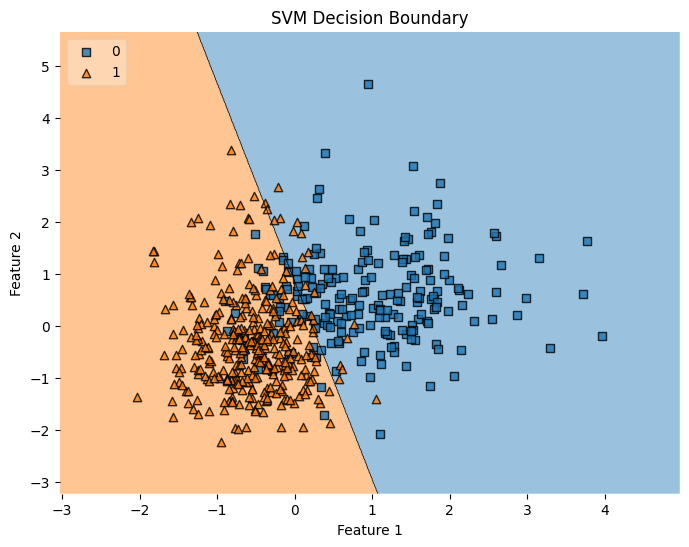

In [6]:
from mlxtend.plotting import plot_decision_regions

# Select two features for visualization
X_vis = X_scaled[:, :2]  # Use only first two features
y = np.array(y)
# Train a new SVM with selected features
svm_vis = SVC(kernel="linear", C=1.0)
svm_vis.fit(X_vis, y)

# Plot decision boundary
plt.figure(figsize=(8,6))
plot_decision_regions(X_vis, y, clf=svm_vis, legend=2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary")
plt.show()


## 🔥 7. Using Non-Linear Kernels (RBF & Polynomial)

If the data is **not linearly separable**, we apply **kernel tricks**.


In [7]:
# Initialize SVM models with different kernels
svm_rbf = SVC(kernel="rbf", C=1.0, gamma='scale')  # RBF Kernel
svm_poly = SVC(kernel="poly", degree=3, C=1.0)  # Polynomial Kernel

# Train models
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

# Predict & Evaluate
accuracy_rbf = accuracy_score(y_test, svm_rbf.predict(X_test))
accuracy_poly = accuracy_score(y_test, svm_poly.predict(X_test))

print(f"📊 RBF SVM Accuracy: {accuracy_rbf:.4f}")
print(f"📊 Polynomial SVM Accuracy: {accuracy_poly:.4f}")


📊 RBF SVM Accuracy: 0.9737
📊 Polynomial SVM Accuracy: 0.8684


## 🎯 8. Hyperparameter Tuning with GridSearchCV

We can **tune the SVM hyperparameters** using Grid Search.


In [8]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],   # Regularization strength
    'gamma': ['scale', 0.1, 1],  # Kernel coefficient for RBF
    'kernel': ['linear', 'rbf', 'poly']
}

# Perform Grid Search
grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(f"✅ Best parameters: {grid_search.best_params_}")

# Evaluate best model
best_svm = grid_search.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

# Compute accuracy
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print(f"📊 Best SVM Accuracy: {accuracy_best_svm:.4f}")


✅ Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
📊 Best SVM Accuracy: 0.9737


# 📖 9. Support Vector Regression (SVR) - Introduction

Support Vector Regression (**SVR**) is an extension of **Support Vector Machines (SVM)** used for **predicting continuous values** rather than classification.

### 🔹 Why Use SVR?
✔ Works well for **small to medium-sized datasets**  
✔ **Robust to outliers** (by ignoring small errors within margin)  
✔ **Can model non-linear relationships** using kernel tricks  

---

## 🧮 1. Mathematics Behind SVR

### 🔹 1. The SVR Objective
Unlike traditional regression, which minimizes **MSE (Mean Squared Error)**, SVR **finds a hyperplane that best fits the data while ignoring small deviations**.

Instead of classifying data, **SVR tries to fit the best function** within a margin **$\epsilon$**:

$$
y - (w^T x + b) \leq \epsilon
$$
$$
(w^T x + b) - y \leq \epsilon
$$

where:
- **$w$** is the weight vector (determines the slope of the function).
- **$b$** is the bias (intercept).
- **$\epsilon$** is the tolerance margin (defines how much error we allow before penalizing).

✅ **Points inside the margin are ignored**  
✅ **Only points outside the margin contribute to the loss function**  

---

### 🔹 2. SVR Optimization Problem
SVR minimizes:

$$
\frac{1}{2} ||w||^2
$$

subject to:

$$
\begin{aligned}
y_i - (w^T x_i + b) &\leq \epsilon + \xi_i^+ \\
(w^T x_i + b) - y_i &\leq \epsilon + \xi_i^-
\end{aligned}
$$

where **$\xi_i^+, \xi_i^-$** are **slack variables** allowing certain errors.

✅ **$C$ controls the balance between margin width and error tolerance**  
✅ **Higher $C$** → Less tolerance for errors (overfitting risk)  
✅ **Lower $C$** → More flexibility (better generalization)  

---

### 🔹 3. Kernel Trick in SVR
SVR can also use **kernel functions** to **model non-linear relationships**, similar to SVM.

- **Linear SVR**: Best for simple linear relationships.  
- **Polynomial & RBF SVR**: Capture **complex relationships** in data.

---

## 🔥 2. Implementing SVR in Python


📊 SVR Performance:
Mean Squared Error: 0.0081
R² Score: 0.9831


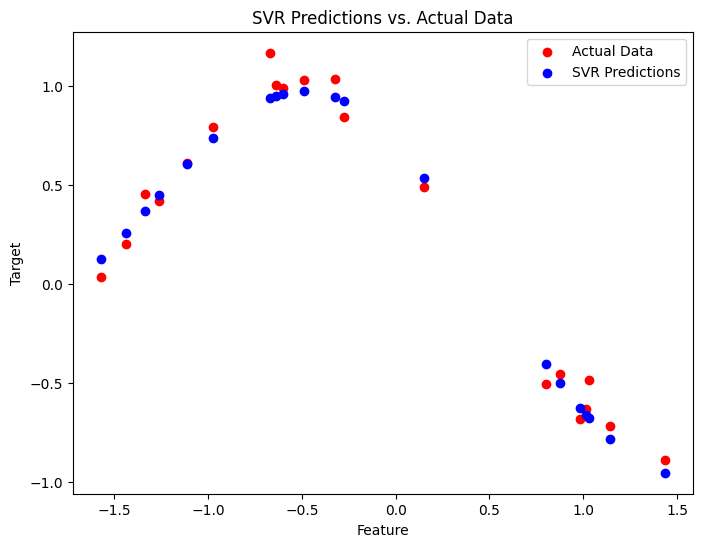

In [9]:
from sklearn.svm import SVR


# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)  # Feature
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Target with noise

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVR model (RBF Kernel)
svr_rbf = SVR(kernel="rbf", C=1.0, epsilon=0.1)
svr_rbf.fit(X_train, y_train)

# Predict
y_pred = svr_rbf.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 SVR Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="red", label="Actual Data")
plt.scatter(X_test, y_pred, color="blue", label="SVR Predictions")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("SVR Predictions vs. Actual Data")
plt.legend()
plt.show()


## 💡 10. Interview Questions - SVM & SVR

### 🔹 **General Questions on SVM**

1️⃣ **What is the objective of SVM?**  
   - **Maximize the margin** between classes while **minimizing classification errors**.  
   - This helps in **better generalization** and prevents overfitting.

2️⃣ **What is the difference between Hard Margin and Soft Margin SVM?**  
   - **Hard Margin SVM**: No misclassification allowed (strict separation).  
   - **Soft Margin SVM**: Allows misclassification using **slack variables** ($\xi_i$), controlled by **$C$ parameter**.

3️⃣ **When to use RBF vs. Polynomial Kernels?**  
   - **RBF Kernel**: Used when **data has complex, non-linear relationships** (e.g., curved decision boundaries).  
   - **Polynomial Kernel**: Used when **the decision boundary follows a polynomial shape**.

4️⃣ **What does the `C` parameter control in SVM?**  
   - **C (Regularization parameter)** controls the tradeoff between:
     - **Large margin** (simpler model, more errors allowed).
     - **Small margin** (complex model, fewer errors allowed).
   - **Higher `C`** → **Less margin**, but tries to classify all points correctly (**overfitting risk**).  
   - **Lower `C`** → **Wider margin**, allowing some misclassification (**better generalization**).  

5️⃣ **What is the mathematical formulation of the SVM optimization problem?**  
   - Minimize:

     $$
     \frac{1}{2} ||w||^2
     $$

     subject to:

     $$
     y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \forall i
     $$

   - **Slack variables $\xi_i$** allow misclassified points when **Soft Margin SVM** is used.

---

### 🔹 **Advanced Questions on SVM**

6️⃣ **How does SVM handle imbalanced datasets?**  
   - Use **class weighting** (`class_weight='balanced'` in `sklearn`).
   - Oversampling **(SMOTE)** or undersampling the majority class.
   - Adjust the **C parameter** to penalize misclassifications differently.

7️⃣ **What are Support Vectors and why are they important?**  
   - **Support vectors** are the **closest points** to the decision boundary.  
   - The **hyperplane depends only on these points**—ignoring all others.  

8️⃣ **How does the `gamma` parameter affect RBF SVM?**  
   - **Higher `gamma`** → More complex decision boundary (**higher variance, overfitting risk**).  
   - **Lower `gamma`** → Smoother decision boundary (**better generalization**).  
   - **Gamma defines how much influence a single training example has**.

---

### 🔹 **Support Vector Regression (SVR) Questions**

9️⃣ **How does SVR differ from Linear Regression?**  
   - **Linear Regression** minimizes **MSE**, trying to fit all points perfectly.  
   - **SVR** ignores points **within an $\epsilon$ margin** and focuses only on **violating points**.

🔟 **What does the $\epsilon$ parameter control in SVR?**  
   - **Defines the margin of tolerance for error**.  
   - **Larger $\epsilon$** → Allows more points inside the margin, leading to a **simpler model**.  
   - **Smaller $\epsilon$** → Model becomes **more sensitive to small variations**.

1️⃣1️⃣ **What is the mathematical formulation of SVR?**  
   - Minimize:

     $$
     \frac{1}{2} ||w||^2 + C \sum (\xi_i^+ + \xi_i^-)
     $$

     subject to:

     $$
     | y_i - (w^T x_i + b) | \leq \epsilon + \xi_i
     $$

   - The model **ignores points inside the $\epsilon$-tube**, focusing only on **outliers**.

1️⃣2️⃣ **When should you use SVR instead of Decision Trees or Linear Regression?**  
   - Use **SVR** when:
     - Data has a **continuous target variable**.
     - The relationship between **features and target is complex but smooth**.
     - **Outliers need to be ignored** instead of being averaged (like in Linear Regression).

1️⃣3️⃣ **How do we tune the hyperparameters of SVR?**  
   - **Key hyperparameters**:
     - `C` (Regularization) → Higher C means **stricter fit**, lower C allows more flexibility.
     - `epsilon (ε)` → Defines **how much error to tolerate** before penalizing.
     - `gamma` (for RBF kernel) → Controls the **spread of influence** of each support vector.

1️⃣4️⃣ **Why does SVR allow tolerance in predictions?**  
   - Instead of fitting **exactly to data**, **SVR allows a margin** (epsilon-tube) to generalize better.

1️⃣5️⃣ **Can SVR be used with different kernels like Polynomial or RBF?**  
   - Yes, SVR supports **linear, polynomial, and RBF kernels**, just like SVM.

---

### 🔹 **Comparison: SVM vs. SVR**
| **Aspect**       | **SVM (Classification)** | **SVR (Regression)** |
|-----------------|------------------------|---------------------|
| **Objective**   | Find optimal decision boundary | Predict continuous values |
| **Optimization** | Maximizes margin, minimizes classification error | Minimizes error within margin (epsilon) |
| **Error Tolerance** | No tolerance for misclassification (Soft Margin allows some) | Uses $\epsilon$ to ignore small deviations |
| **Hyperparameters** | `C`, `kernel`, `gamma` | `C`, `epsilon`, `gamma` |

---

## ✅ Summary:
✔ **SVM maximizes margin for classification, while SVR finds a best-fit function with tolerance**.  
✔ **Hyperparameters like `C`, `gamma`, and `epsilon` control decision boundaries and generalization**.  
✔ **Use SVM for classification, SVR for regression problems where small deviations don’t matter**.  